# Mobile Price Classification Using KNN

In [278]:
# Importing the required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score 

In [279]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

## Without Normalization

In [280]:
data_set = np.round(data_set, decimals=4) 
data_set.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [281]:
# Dropping the class labels from the dataset
dset_modified = data_set.drop('price_range', axis=1)

In [282]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_set.columns[:-1])
data_set_feat = np.round(data_set_feat, decimals=4)

In [283]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [284]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5, verbose=1)
   print(final_score)
   Accurate_rates.append(final_score.mean())

[0.895  0.915  0.915  0.9125 0.9025]
[0.875  0.925  0.9025 0.89   0.8825]
[0.92   0.92   0.9325 0.9175 0.9075]
[0.915  0.9225 0.915  0.905  0.89  ]
[0.92   0.9175 0.925  0.925  0.91  ]
[0.9175 0.94   0.92   0.9225 0.9025]
[0.9325 0.9375 0.925  0.925  0.905 ]
[0.935  0.9325 0.93   0.92   0.905 ]
[0.9425 0.935  0.9375 0.93   0.91  ]
[0.94   0.94   0.9225 0.9325 0.9225]
[0.9425 0.9375 0.94   0.93   0.9225]
[0.9325 0.94   0.925  0.93   0.9225]
[0.94   0.935  0.9425 0.935  0.9175]
[0.93   0.945  0.9275 0.93   0.9125]
[0.9425 0.935  0.9275 0.925  0.92  ]
[0.935  0.9425 0.925  0.925  0.9125]
[0.9375 0.94   0.9325 0.9275 0.92  ]
[0.94   0.9425 0.93   0.925  0.915 ]
[0.94   0.9375 0.9325 0.9275 0.9225]
[0.9325 0.94   0.9325 0.925  0.92  ]
[0.935  0.935  0.9325 0.93   0.915 ]
[0.93   0.94   0.9275 0.935  0.915 ]
[0.9325 0.9375 0.935  0.9375 0.92  ]
[0.925  0.935  0.9325 0.9325 0.915 ]
[0.93   0.9325 0.935  0.9325 0.925 ]
[0.935  0.945  0.9275 0.94   0.9225]
[0.945  0.9375 0.93   0.935  0.9175]
[

In [285]:
Acc_Rate_Per = [el*100 for el in Accurate_rates]

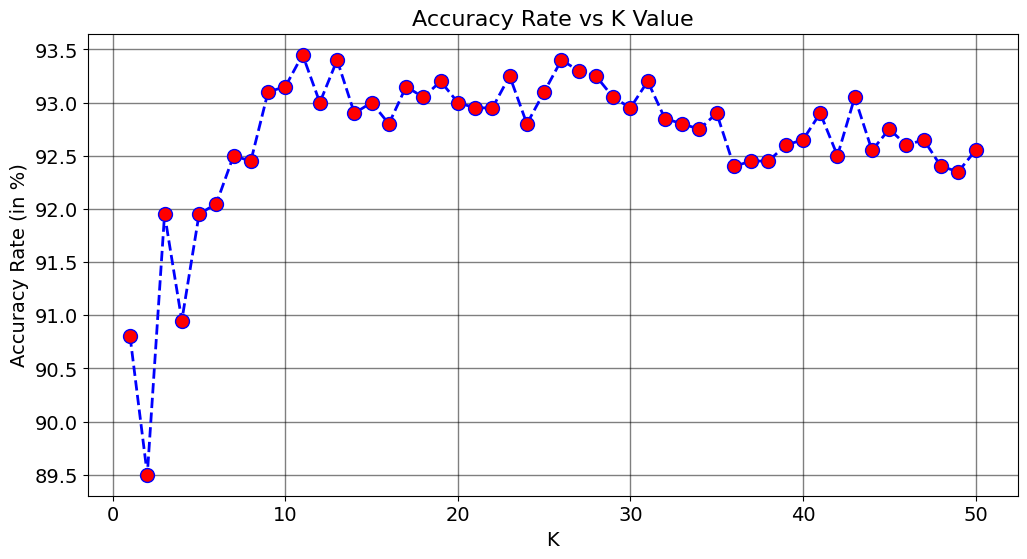

In [286]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 11
Accuracy Rate (Without Normalization): 93.75 %


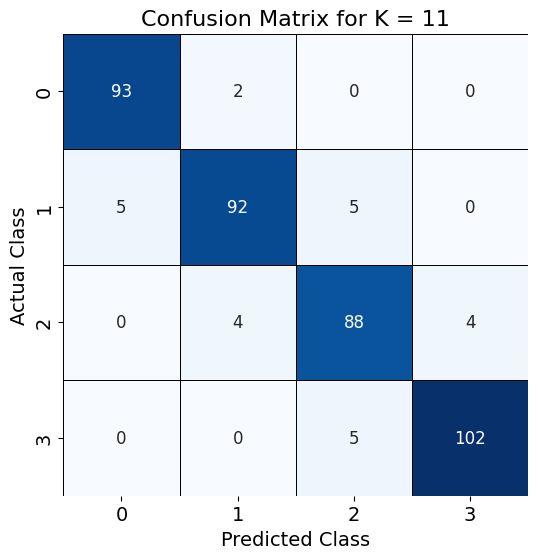

In [287]:
max_index = Accurate_rates.index(max(Accurate_rates))
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index+1)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', max_index+1)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (Without Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index+1), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

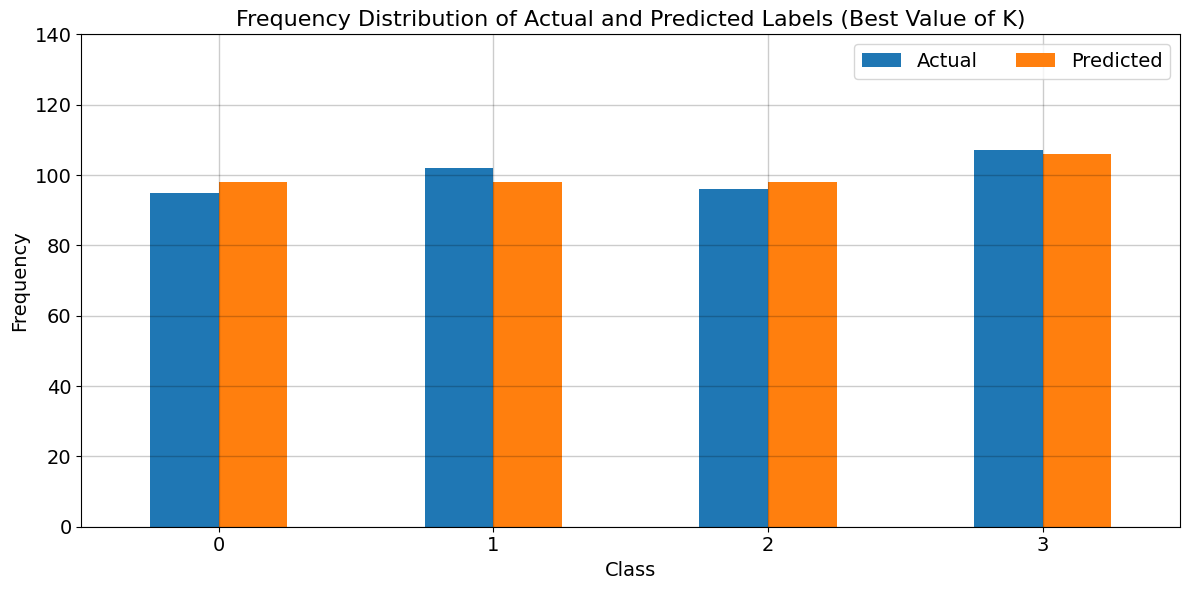

In [288]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Accuracy Rate (Without Normalization): 92.0 %


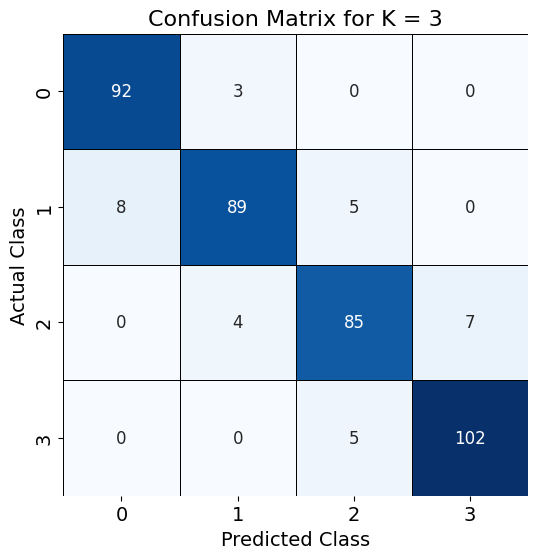

In [289]:
t = 3
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (Without Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

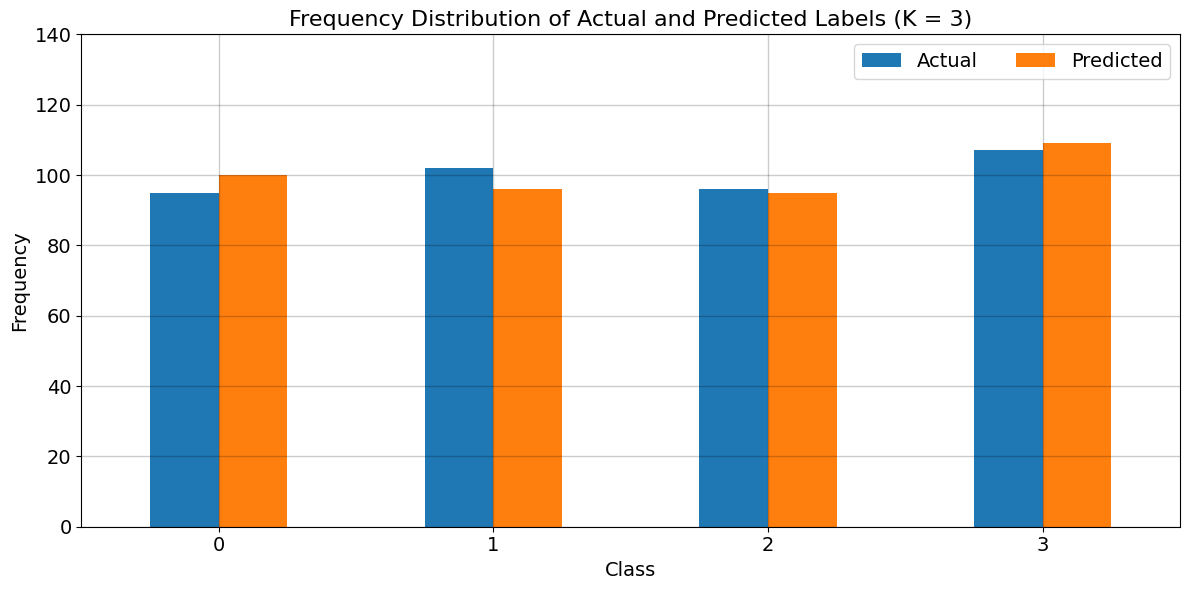

In [290]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Accuracy Rate (Without Normalization): 92.0 %


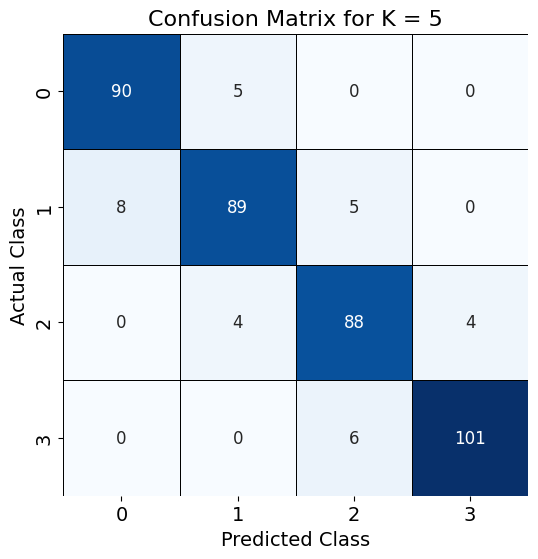

In [291]:
t = 5
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (Without Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

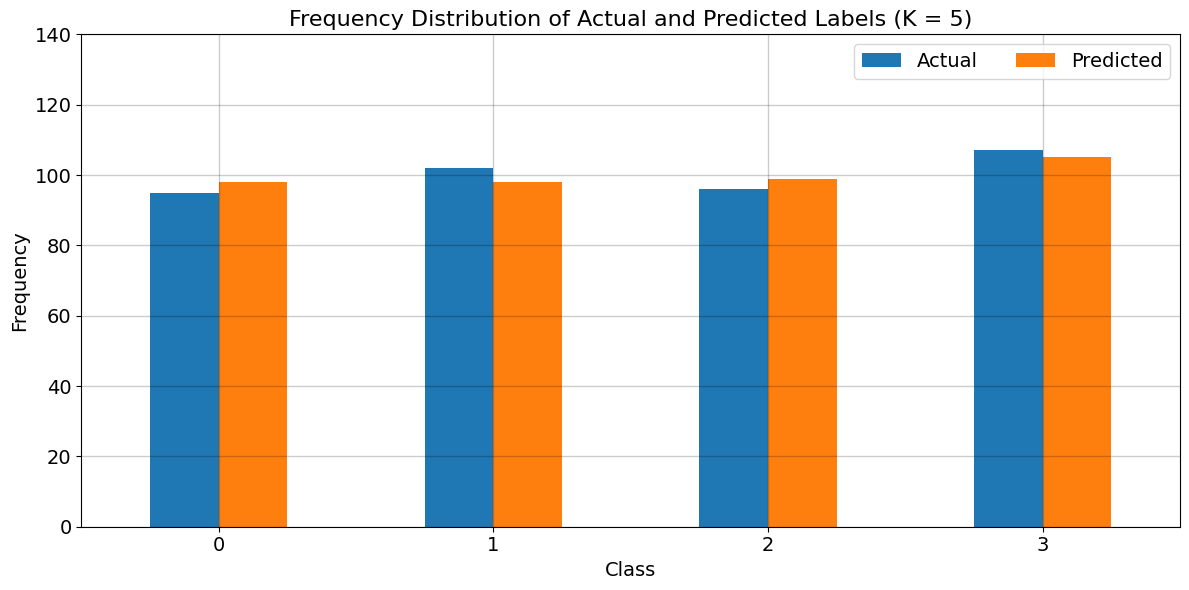

In [292]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Accuracy Rate (Without Normalization): 93.75 %


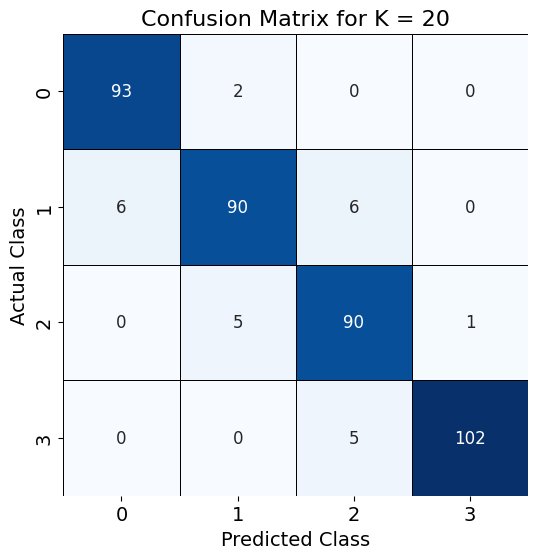

In [293]:
t = 20
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (Without Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

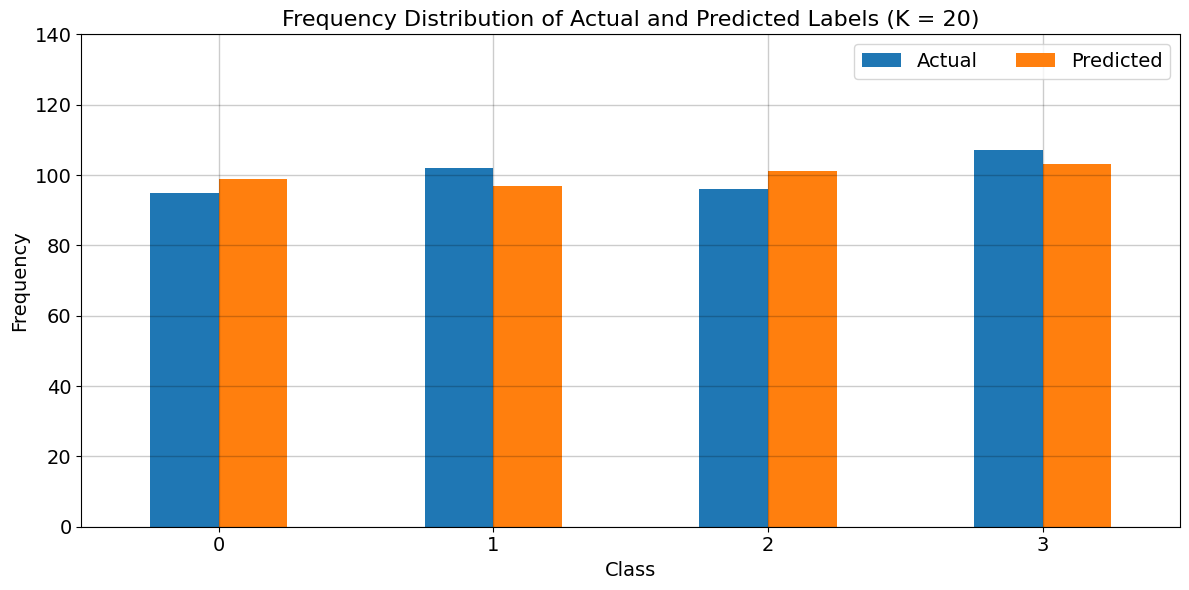

In [294]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Accuracy Rate (Without Normalization): 93.0 %


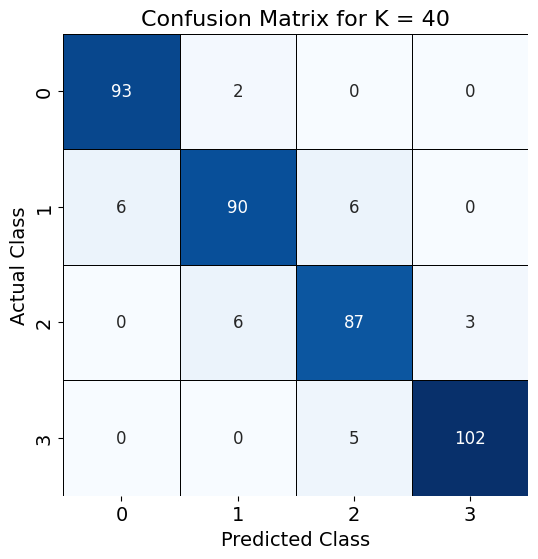

In [295]:
t = 40
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (Without Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

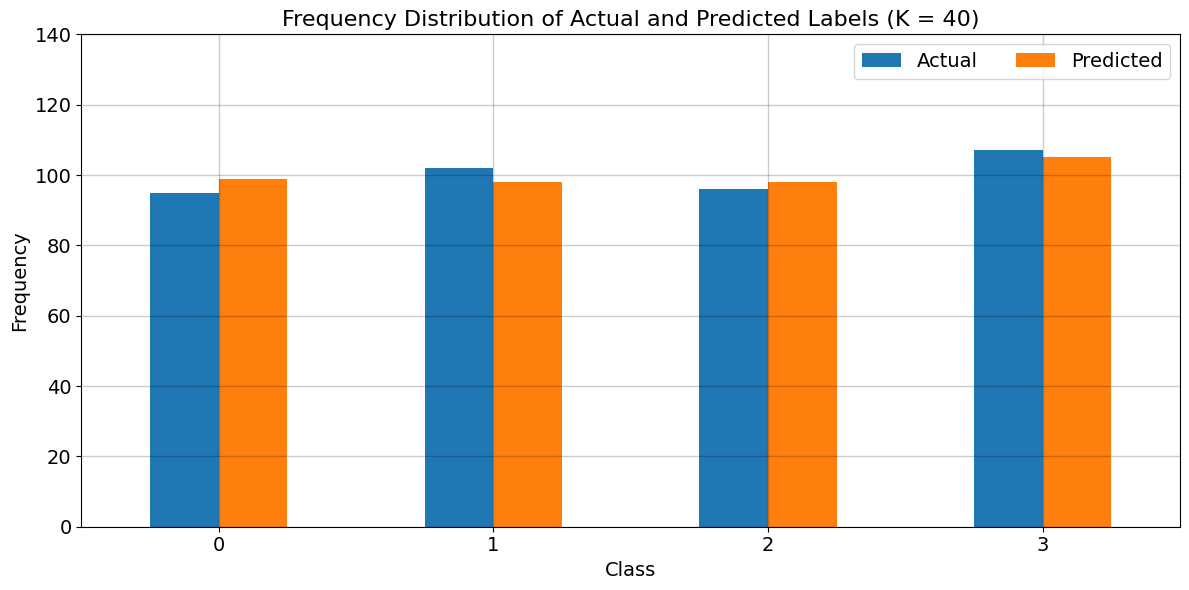

In [296]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [297]:
scaled = StandardScaler()
scaled.fit(data_set.drop('price_range', axis=1))

StandardScaler()

In [298]:
# Dropping the class labels from the normalized dataset
dset_modified = scaled.transform(data_set.drop('price_range', axis=1)) 

In [299]:
data_set_feat = pd.DataFrame(dset_modified,columns=data_set.columns[:-1]) 
data_set_feat = np.round(data_set_feat, decimals=4) 
data_set_feat.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.9026,-0.9900,0.8308,-1.0192,-0.7625,-1.0440,-1.3806,0.3407,1.3492,-1.1020,-1.3058,-1.4089,-1.1468,0.3917,-0.7850,0.2831,1.4625,-1.7869,-1.006,0.9861
1,-0.4951,1.0101,-1.2531,0.9812,-0.9929,0.9579,1.1550,0.6875,-0.1201,-0.6648,-0.6460,0.5858,1.7045,0.4673,1.1143,-0.6353,-0.7343,0.5596,0.994,-1.0141
2,-1.5377,1.0101,-1.2531,0.9812,-0.5321,0.9579,0.4935,1.3812,0.1342,0.2096,-0.6460,1.3927,1.0750,0.4415,-0.3102,-0.8649,-0.3681,0.5596,0.994,-1.0141
3,-1.4193,1.0101,1.1985,-1.0192,-0.9929,-1.0440,-1.2153,1.0344,-0.2613,0.6468,-0.1512,1.2867,1.2370,0.5946,0.8769,0.5127,-0.0020,0.5596,-1.006,-1.0141
4,1.3259,1.0101,-0.3950,-1.0192,2.0023,0.9579,0.6589,0.3407,0.0212,-1.1020,0.6735,1.2687,-0.0915,-0.6577,-1.0224,-0.8649,0.7302,0.5596,0.994,-1.0141


In [300]:
# Splitting the dataset into training and test subsets
one_train, one_test, two_train, two_test = train_test_split(data_set_feat, data_set['price_range'], test_size=0.20)

In [301]:
# Computing accuracy rates for different values of K (number of neighbours)
Accurate_rates = []
for i in range(1,51):
   k_nearest_neighbour = KNeighborsClassifier(n_neighbors = i)
   # Cross Validation
   final_score = cross_val_score(k_nearest_neighbour, data_set_feat, data_set['price_range'], cv=5)
   print(final_score)
   Accurate_rates.append(final_score.mean())

[0.445  0.46   0.46   0.47   0.4325]
[0.4275 0.445  0.44   0.4575 0.44  ]
[0.4575 0.4725 0.46   0.4725 0.44  ]
[0.48   0.515  0.5075 0.5375 0.4825]
[0.5075 0.5    0.5125 0.5075 0.4875]
[0.5075 0.525  0.485  0.5375 0.475 ]
[0.53   0.5175 0.495  0.5275 0.5025]
[0.525  0.5175 0.4875 0.5475 0.5225]
[0.575 0.56  0.505 0.555 0.525]
[0.56   0.565  0.535  0.55   0.5225]
[0.5675 0.5725 0.5325 0.57   0.5   ]
[0.56   0.5775 0.5525 0.575  0.5325]
[0.5775 0.5925 0.5525 0.5775 0.545 ]
[0.585  0.585  0.5725 0.595  0.5425]
[0.5675 0.575  0.57   0.5975 0.5425]
[0.59   0.5775 0.5775 0.6025 0.5625]
[0.6    0.5875 0.58   0.6025 0.585 ]
[0.6075 0.5925 0.5775 0.58   0.575 ]
[0.6    0.5975 0.57   0.6025 0.575 ]
[0.6025 0.6025 0.59   0.6025 0.58  ]
[0.6125 0.6025 0.5975 0.595  0.5975]
[0.6175 0.6175 0.605  0.62   0.6125]
[0.6275 0.6225 0.605  0.6175 0.605 ]
[0.6275 0.6475 0.605  0.615  0.5925]
[0.6175 0.6475 0.61   0.605  0.6   ]
[0.625  0.645  0.6025 0.63   0.6125]
[0.6375 0.6375 0.61   0.62   0.6125]
[0.63 

In [302]:
Acc_Rate_Per = [el*100 for el in Accurate_rates]

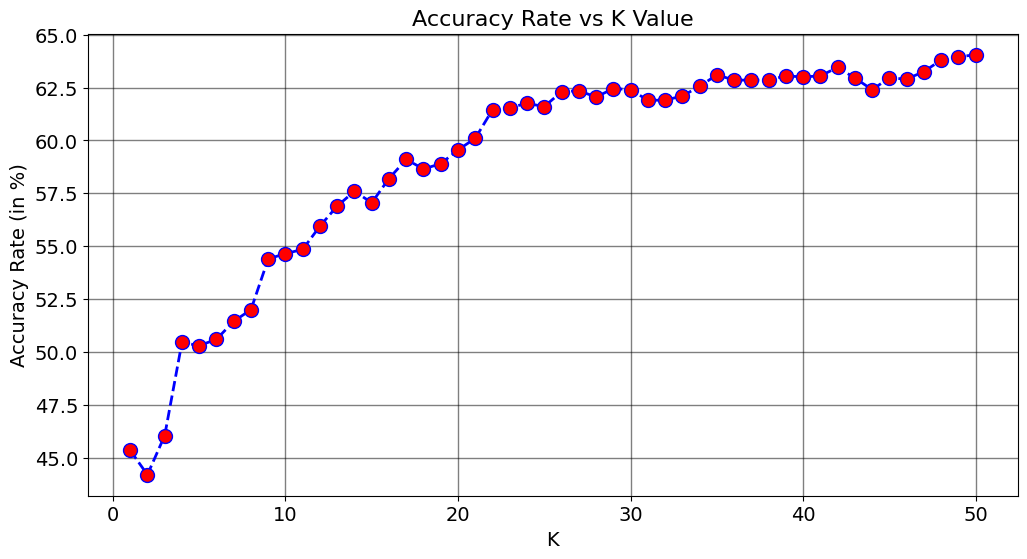

In [303]:
plt.figure(figsize=(12,6))
plt.plot(range(1,51), Acc_Rate_Per , color='blue', linestyle='dashed', marker='o', markerfacecolor='red', 
         markersize=10, linewidth=2)
plt.title('Accuracy Rate vs K Value',color='black',fontsize=16)
plt.xlabel('K',color='black',fontsize=14)
plt.ylabel('Accuracy Rate (in %)',color='black',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linewidth=1, color='black', alpha=0.5)
plt.show()

### Best Value of K

For K = 50
Accuracy Rate (With Normalization): 61.0 %


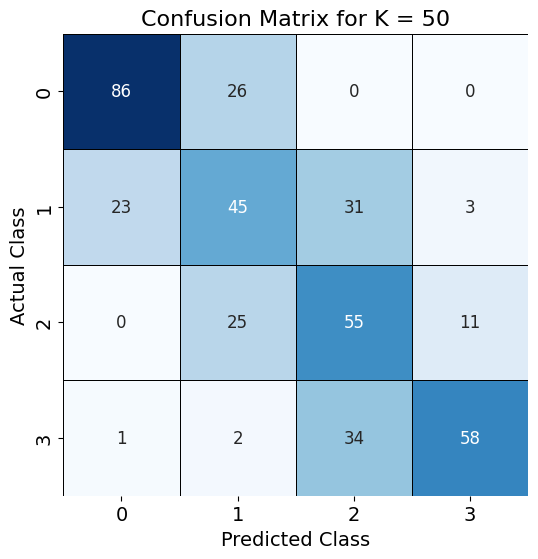

In [304]:
# First K value based on Accurate_rates
max_index = Accurate_rates.index(max(Accurate_rates))
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index+1)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', max_index+1)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (With Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(max_index+1), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

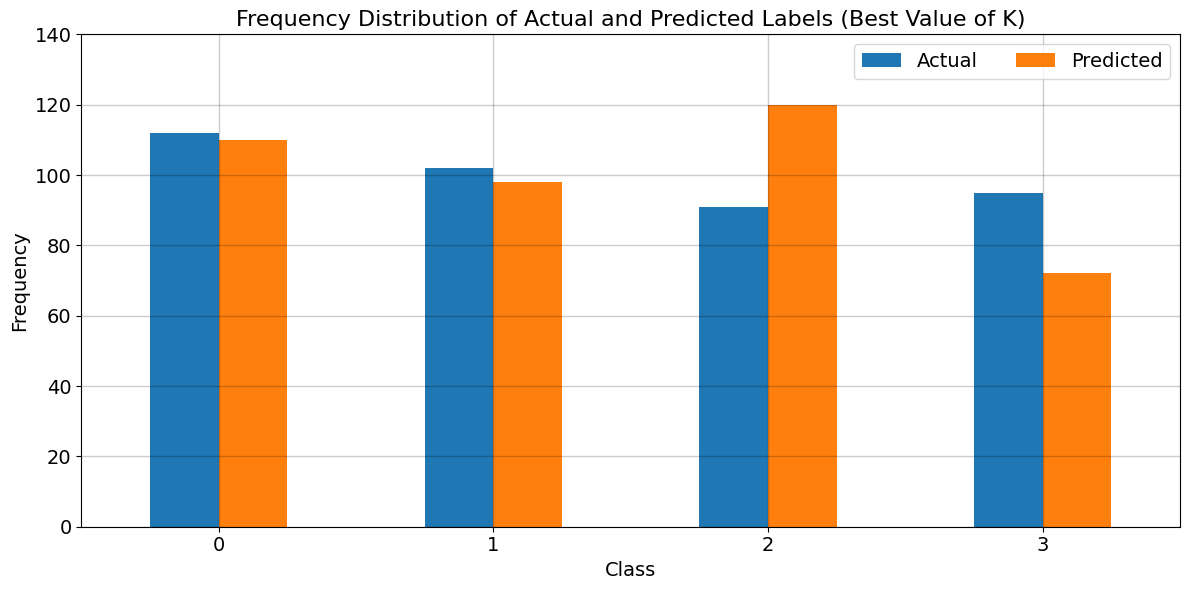

In [305]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Best Value of K)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 3

For K = 3
Accuracy Rate (With Normalization): 41.5 %


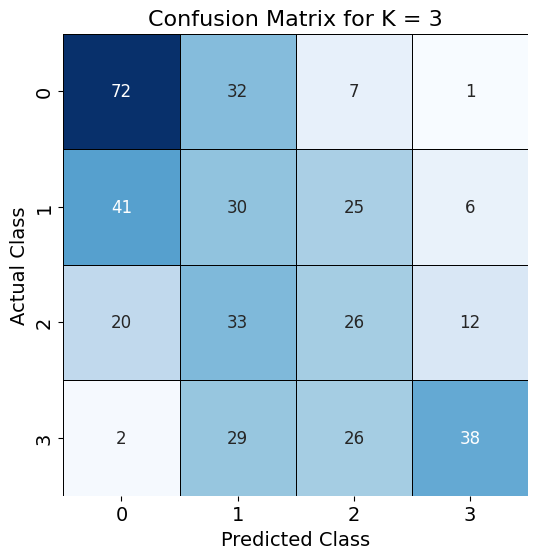

In [306]:
t = 3
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (With Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

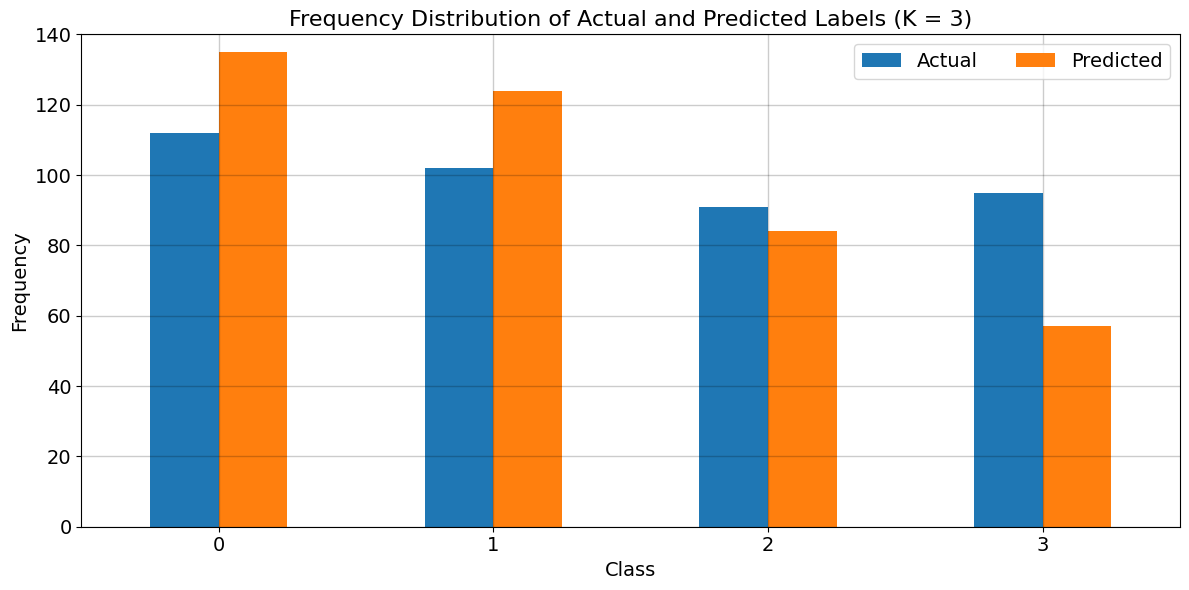

In [307]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 3)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 5

For K = 5
Accuracy Rate (With Normalization): 45.25 %


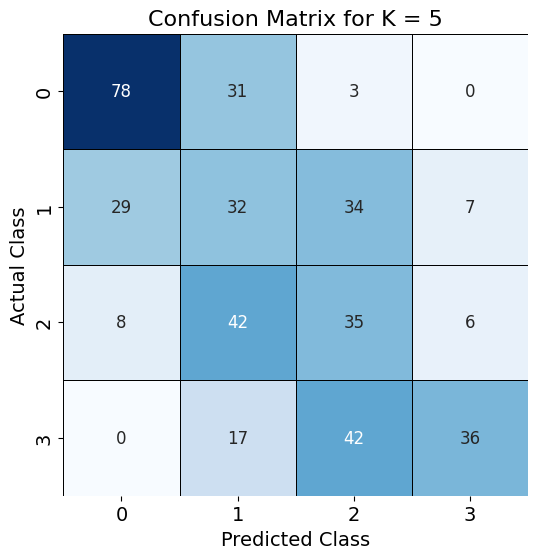

In [308]:
t = 5
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (With Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

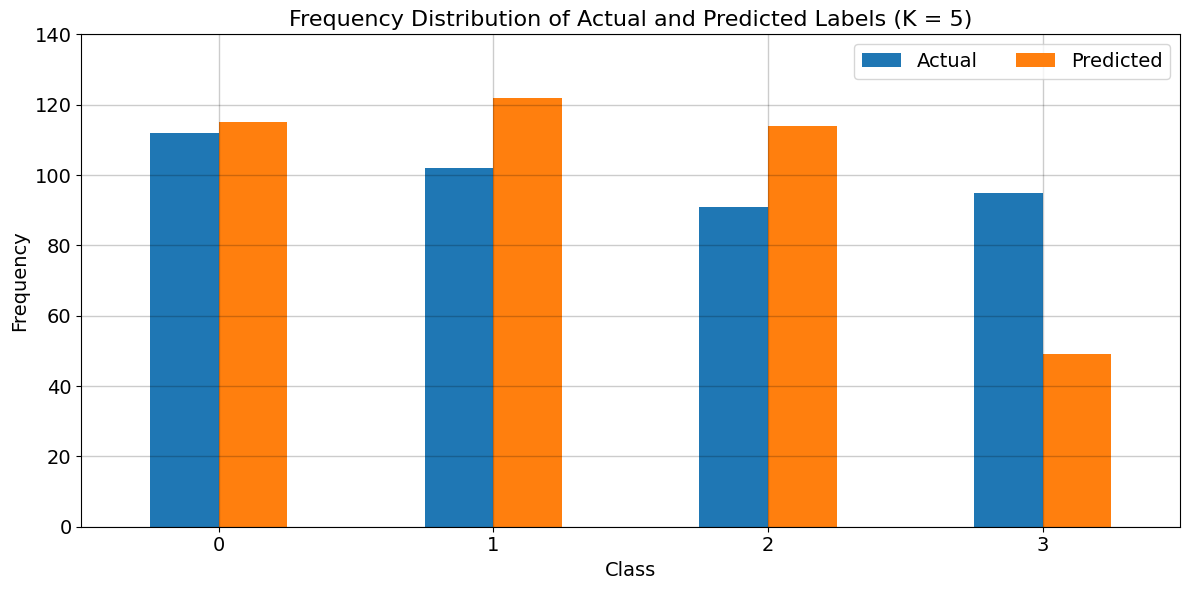

In [309]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 5)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 20

For K = 20
Accuracy Rate (With Normalization): 59.5 %


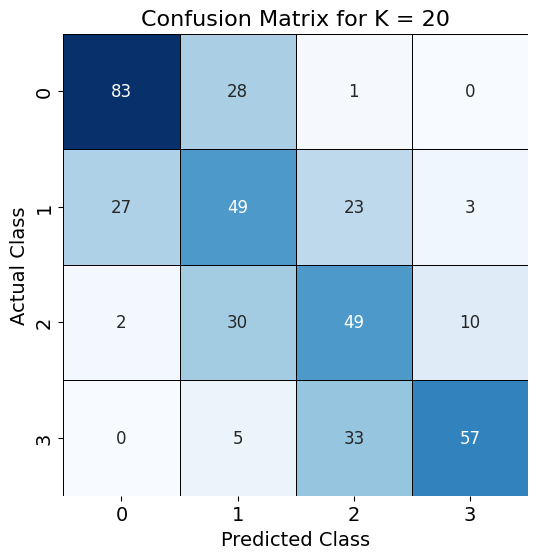

In [310]:
t = 20
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (With Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

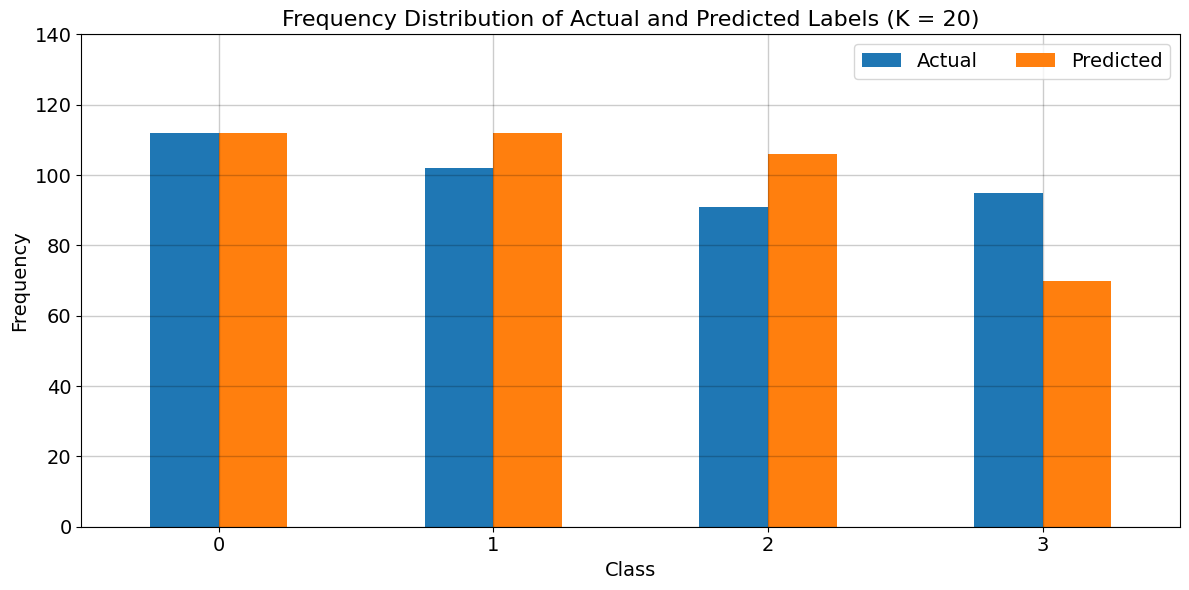

In [311]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 20)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### K = 40

For K = 40
Accuracy Rate (With Normalization): 61.0 %


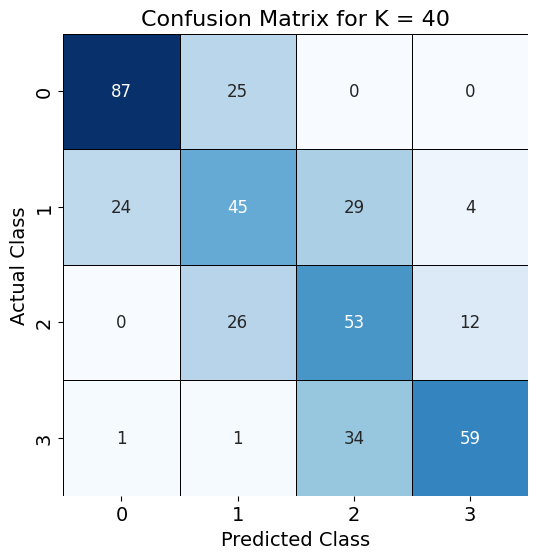

In [312]:
t = 40
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)

k_nearest_neighbour.fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K =', t)
conf_matrix = confusion_matrix(two_test, prediction)
print('Accuracy Rate (With Normalization):',round(accuracy_score(two_test, prediction)*100,2),'%')

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=k_nearest_neighbour.classes_, yticklabels=k_nearest_neighbour.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for K = ' + str(t), color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

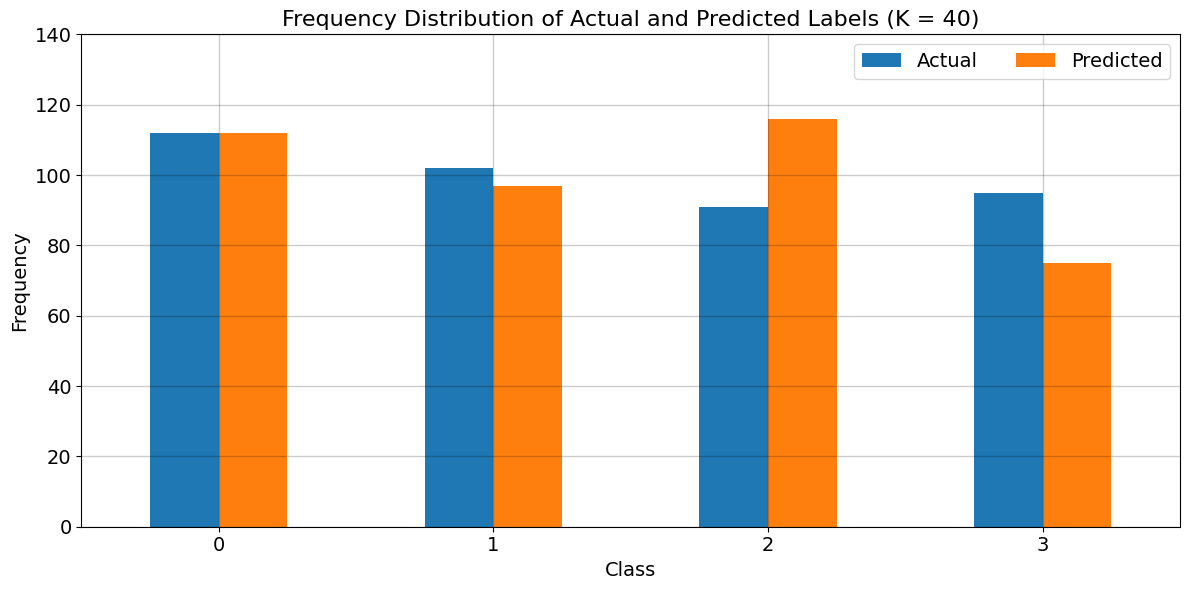

In [313]:
# Plotting the bar graph for frequency distribution of actual and predicted labels
actual_labels, actual_counts = np.unique(two_test, return_counts=True)
predicted_labels, predicted_counts = np.unique(prediction, return_counts=True)

labels = np.unique(two_test)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (K = 40)', fontsize=16)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***